## Probability & Statistics

###　代表値・統計量
データ分析において、最初に確認すべき量
* 平均値（mean）：　データの合計をデータ数で割ったもの
* 中央値(median)：　 データを大きさ順に並べて中央に位置するデータ値
* 分散：　対象のデータが平均からどれだけばらつきがあるか。
* 標準偏差：　分散の平方根

#### 平均値・中央値・標準偏差の計算

In [9]:
import numpy as np

# 外れ値なし
x = [3, 4, 5, 3, 4, 5, 3, 4, 5]
print("外れ値なしの数値のリスト")
print("平均値：", np.mean(x))
print("中央値：", np.median(x))
print("標準偏差", np.std(x))
# 外れ値あり
x = [3, 4, 5, 3, 4, 5, 3, 4, 5, 100]
print("外れ値なしの数値のリスト")
print("平均値：", np.mean(x))
print("中央値：", np.median(x))
print("標準偏差", np.std(x))

外れ値なしの数値のリスト
平均値： 4.0
中央値： 4.0
標準偏差 0.816496580927726
外れ値なしの数値のリスト
平均値： 13.6
中央値： 4.0
標準偏差 28.810414783546594


#### 売り上げ金額と気温の散布図

MEMO 大小関係がない値をカテゴリ変数と呼ぶ

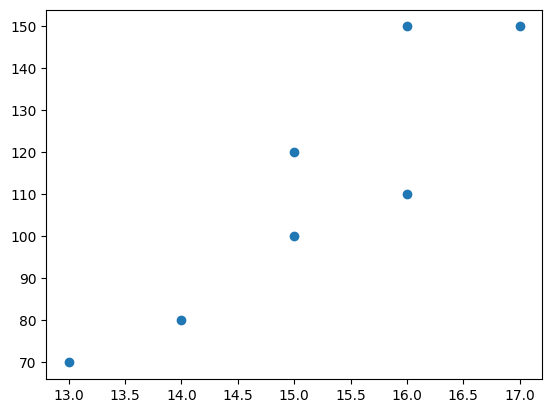

In [11]:
import matplotlib.pyplot as plt

# 気温と売り上げの一週間分の記録を保持したリスト
pair_list = [(15, 120), (14, 80), (17, 150), (16, 150), (16, 110), (15, 100), (13, 70)]

# 売り上げ金額を縦軸、気温を横軸とした散布図（scatter plot）
plt.scatter([x for x, y in pair_list], [y for x, y in pair_list])

Memo 気温と売り上げ金額は比例関係にありそうということがわかる

#### 相関係数
$
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}
$

In [19]:
# 相関係数の計算
x_i = [x for x, y in pair_list]
y_i = [y for x, y in pair_list]
x_bar = np.mean(x_i)
y_bar = np.mean(y_i)
# 分子
numerator = np.sum([(x - x_bar) * (y - y_bar) for x, y in pair_list])
# 分母
denominator1 = np.sqrt(np.sum([(x - x_bar) ** 2 for x in x_i]))

denominator2 = np.sqrt(np.sum([(y - y_bar) ** 2 for y in y_i]))

r_xy = numerator / (denominator1 * denominator2)
r_xy

0.9042001578168488

### 確率と確率分布